In [22]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
# Import our data into pandas from CSV
filepath1 = "Datasets/Olympic_Athlete_Event_Details.csv"
filepath2 = "Datasets/Olympic_Country_Profiles.csv"
filepath3 = "Datasets/Olympic_Event_Results.csv"
filepath4 = "Datasets/Olympic_Games_Summary.csv"
filepath5 = "Datasets/Olympic_Medal_Tally_History.csv"

df_Athlete_Event_Details = pd.read_csv(filepath1)
df_Country_Profiles = pd.read_csv(filepath2)
df_Event_Results = pd.read_csv(filepath3)
df_Games_Summary = pd.read_csv(filepath4)
df_Medal_Tally_History = pd.read_csv(filepath5)



df_Athlete_Event_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2   country_noc  316834 non-null  object
 3   sport        316834 non-null  object
 4   event        316834 non-null  object
 5   result_id    316834 non-null  int64 
 6   athlete      316834 non-null  object
 7   athlete_id   316834 non-null  int64 
 8   pos          316834 non-null  object
 9   medal        44687 non-null   object
 10  isTeamSport  316834 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.5+ MB


In [24]:
df_Event_Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7394 non-null   int64 
 1   event_title          7394 non-null   object
 2   edition              7394 non-null   object
 3   edition_id           7394 non-null   int64 
 4   sport                7394 non-null   object
 5   sport_url            7394 non-null   object
 6   result_date          7394 non-null   object
 7   result_location      7393 non-null   object
 8   result_participants  7394 non-null   object
 9   result_format        7394 non-null   object
 10  result_detail        7394 non-null   object
 11  result_description   7394 non-null   object
dtypes: int64(2), object(10)
memory usage: 693.3+ KB


In [25]:
df_Medal_Tally_History.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1807 non-null   object
 1   edition_id   1807 non-null   int64 
 2   year         1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB


In [26]:
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Soviet Union': 'Russian Federation'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Russian Olympic Committee': 'Russian Federation'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'ROC': 'Russian Federation'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Unified Team': 'Russian Federation'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'East Germany': 'Germany'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'West Germany': 'Germany'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Saar': 'Germany'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Bohemia': 'Czechia'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Australasia': 'Australia'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Rhodesia': 'Zimbabwe'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'South Yemen': 'Yemen'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'North Yemen': 'Yemen'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Serbia and Montenegro': 'Serbia'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({"Democratic People's Republic of Korea": "Republic of Korea"})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({"Korea Town": "Republic of Korea"})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'South Vietnam': 'Vietnam'})

In [27]:
df_Country_Profiles.to_csv("Datasets/Country_Profiles_Clean.csv", index = False)

In [28]:
#Clean up the athlete event details tab to collapse all of the teams sports into one row
# Filter out individual rows for team sports
non_team_sports = df_Athlete_Event_Details[~df_Athlete_Event_Details['isTeamSport']]
team_sports_grouped = (
    df_Athlete_Event_Details[df_Athlete_Event_Details['isTeamSport']]
    .groupby(['edition', 'country_noc', 'sport', 'event'], as_index=False)
    .agg({
        'athlete': lambda x: ', '.join(x),  # Combine athlete names into one string
        'pos': 'first',                     # Keep position (or change aggregation logic as needed)
        'medal': 'first',                   # Assume medals are the same for team members
        'isTeamSport': 'first'              # Keep the isTeamSport value
    })
)
# Combine the grouped team sports with non-team sports
athlete_results_clean = pd.concat([team_sports_grouped, non_team_sports], ignore_index=True).reset_index(drop = True)
# Display the result
athlete_results_clean.head()

,edition,country_noc,sport,event,athlete,pos,medal,isTeamSport,edition_id,result_id,athlete_id
0,1896 Summer Olympics,AUS,Tennis,"Doubles, Men","Teddy Flack, George Stuart Robertson",3,Bronze,True,NaN,NaN,NaN
1,1896 Summer Olympics,FRA,Tennis,"Doubles, Men","J. Defert, André Vacherot",DNS,None,True,NaN,NaN,NaN
2,1896 Summer Olympics,GBR,Tennis,"Doubles, Men","John Pius Boland, Fritz Traun, Teddy Flack, Ge...",1,Gold,True,NaN,NaN,NaN
3,1896 Summer Olympics,GER,Artistic Gymnastics,"Horizontal Bar, Teams, Men","Carl Schuhmann, Conrad Böcker, Alfred Flatow, ...",1,Gold,True,NaN,NaN,NaN
4,1896 Summer Olympics,GER,Artistic Gymnastics,"Parallel Bars, Teams, Men","Conrad Böcker, Alfred Flatow, Gustav Flatow, G...",1,Gold,True,NaN,NaN,NaN


In [29]:
#USE ATHLETE EVENT DETAIL TO COMBINE ATHLETE WITH COUNTRY TO FIND OUT HOW MANY COMPETED FOR THAT COUNTRY

In [35]:
athlete_results_clean.head()

,edition,country_noc,sport,event,athlete,pos,medal,isTeamSport,edition_id,result_id,athlete_id
0,1896 Summer Olympics,AUS,Tennis,"Doubles, Men","Teddy Flack, George Stuart Robertson",3,Bronze,True,NaN,NaN,NaN
1,1896 Summer Olympics,FRA,Tennis,"Doubles, Men","J. Defert, André Vacherot",DNS,None,True,NaN,NaN,NaN
2,1896 Summer Olympics,GBR,Tennis,"Doubles, Men","John Pius Boland, Fritz Traun, Teddy Flack, Ge...",1,Gold,True,NaN,NaN,NaN
3,1896 Summer Olympics,GER,Artistic Gymnastics,"Horizontal Bar, Teams, Men","Carl Schuhmann, Conrad Böcker, Alfred Flatow, ...",1,Gold,True,NaN,NaN,NaN
4,1896 Summer Olympics,GER,Artistic Gymnastics,"Parallel Bars, Teams, Men","Conrad Böcker, Alfred Flatow, Gustav Flatow, G...",1,Gold,True,NaN,NaN,NaN


In [37]:
athlete_results_clean["AthletesPerCountry"] = athlete_results_clean.groupby("country_noc")["athlete"].transform("count")
print(athlete_results_clean)

                     edition country_noc                sport  \
0       1896 Summer Olympics         AUS               Tennis   
1       1896 Summer Olympics         FRA               Tennis   
2       1896 Summer Olympics         GBR               Tennis   
3       1896 Summer Olympics         GER  Artistic Gymnastics   
4       1896 Summer Olympics         GER  Artistic Gymnastics   
...                      ...         ...                  ...   
217198  2022 Winter Olympics         NED            Bobsleigh   
217199  2022 Winter Olympics         SVK            Bobsleigh   
217200  2022 Winter Olympics         KOR            Bobsleigh   
217201  2022 Winter Olympics         JAM            Bobsleigh   
217202  2022 Winter Olympics         UKR            Bobsleigh   

                             event  \
0                     Doubles, Men   
1                     Doubles, Men   
2                     Doubles, Men   
3       Horizontal Bar, Teams, Men   
4        Parallel Bars, Teams

In [41]:
# Group by 'Country' and sum the 'AthletesPerCountry'
athletes_per_country = athlete_results_clean.groupby("country_noc")["AthletesPerCountry"].sum().reset_index()

# Rename the column for clarity
athletes_per_country.rename(columns={"AthletesPerCountry": "Total_Athletes"}, inplace=True)

# Display the result
print(athletes_per_country)

    country_noc  Total_Athletes
0           AFG            7396
1           AHO            4489
2           ALB            7744
3           ALG          242064
4           AND           38809
..          ...             ...
226         YEM            1600
227         YMD              25
228         YUG         3076516
229         ZAM           25600
230         ZIM           65025

[231 rows x 2 columns]


In [42]:
athletes_per_country = athletes_per_country.sort_values(by="Total_Athletes", ascending=False)
print(athletes_per_country)

    country_noc  Total_Athletes
217         USA       256768576
71          FRA       117874449
76          GBR        86099841
102         ITA        66863329
36          CAN        57957769
..          ...             ...
214         UNK              36
227         YMD              25
188         SSD              25
145         NBO               9
48          COR               1

[231 rows x 2 columns]


In [43]:
athletes_per_country = athletes_per_country.sort_values(by="Total_Athletes", ascending=True)
print(athletes_per_country)

    country_noc  Total_Athletes
48          COR               1
145         NBO               9
227         YMD              25
188         SSD              25
214         UNK              36
..          ...             ...
36          CAN        57957769
102         ITA        66863329
76          GBR        86099841
71          FRA       117874449
217         USA       256768576

[231 rows x 2 columns]


In [44]:
filtered_countries = athletes_per_country[athletes_per_country["Total_Athletes"] >= 200]

Top 20 Countries by Winning Percentage (minimum 200 athletes):
    country_noc  Total_Athletes  total_medals  winning_percentage
13          WIF             289           2.0                0.69
22          KOS             841           3.0                0.36
82          ANZ            7569          12.0                0.16
42          BDI            2209           2.0                0.09
53          GRN            3600           3.0                0.08
80          IOA            7396           5.0                0.07
85          NAM            7921           5.0                0.06
74          TJK            6400           4.0                0.06
51          NIG            3249           2.0                0.06
38          DJI            1936           1.0                0.05
44          MNE            2601           1.0                0.04
154         ETH          153664          58.0                0.04
47          TGA            2809           1.0                0.04
46          G

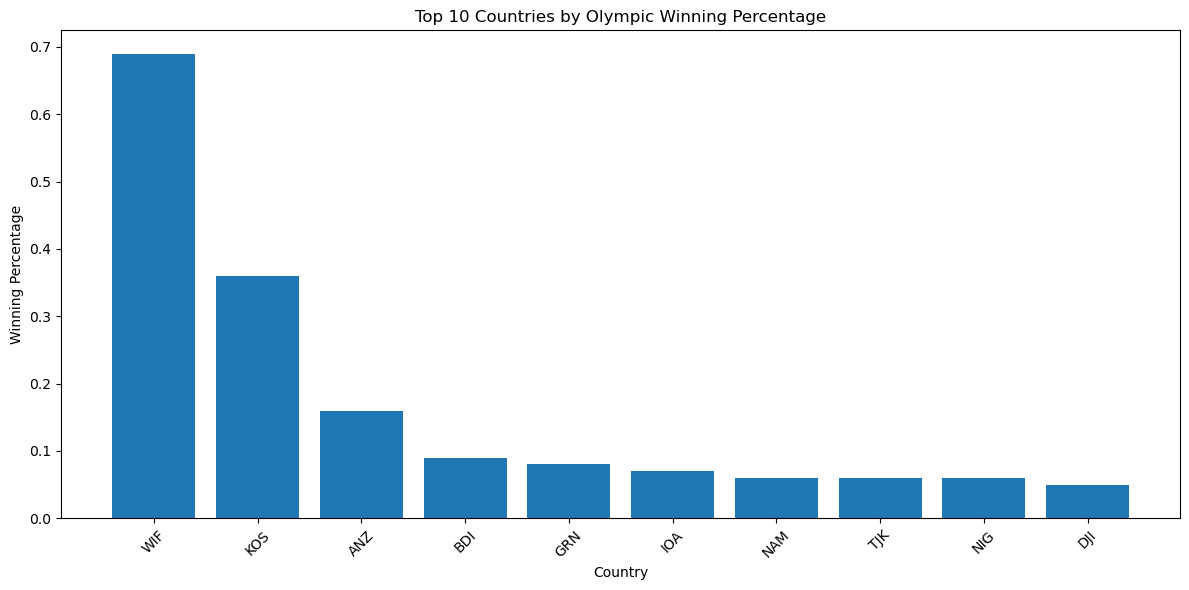

In [47]:
# First, let's calculate medals per country
medals_by_country = athlete_results_clean[athlete_results_clean['medal'].notna()].groupby('country_noc')['medal'].count().reset_index()
medals_by_country.columns = ['country_noc', 'total_medals']
 
# Merge with our athletes per country data
country_performance = pd.merge(athletes_per_country, medals_by_country, on='country_noc', how='left')
 
# Fill NaN values with 0 for countries with no medals
country_performance['total_medals'] = country_performance['total_medals'].fillna(0)
 
# Calculate winning percentage
country_performance['winning_percentage'] = (country_performance['total_medals'] / country_performance['Total_Athletes'] * 100).round(2)
 
# Filter for countries with at least 100 athletes
filtered_performance = country_performance[country_performance['Total_Athletes'] >= 200].sort_values('winning_percentage', ascending=False)
 
# Display top 20 countries by winning percentage
print("Top 20 Countries by Winning Percentage (minimum 200 athletes):")
print(filtered_performance.head(20))
 
# Optional: Create a visualization
plt.figure(figsize=(12, 6))
plt.bar(filtered_performance.head(10)['country_noc'], filtered_performance.head(10)['winning_percentage'])
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Olympic Winning Percentage')
plt.xlabel('Country')
plt.ylabel('Winning Percentage')
plt.tight_layout()
plt.show()

In [49]:
# Aggregate medals by sport
sport_medals = athlete_results_cleans[athlete_results_clean['medal'].notna()].groupby('sport')['medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.pie(sport_medals.values, labels=sport_medals.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Olympic Medals by Top 10 Sports')
plt.tight_layout()
plt.show()

NameError: name 'athlete_results_cleans' is not defined

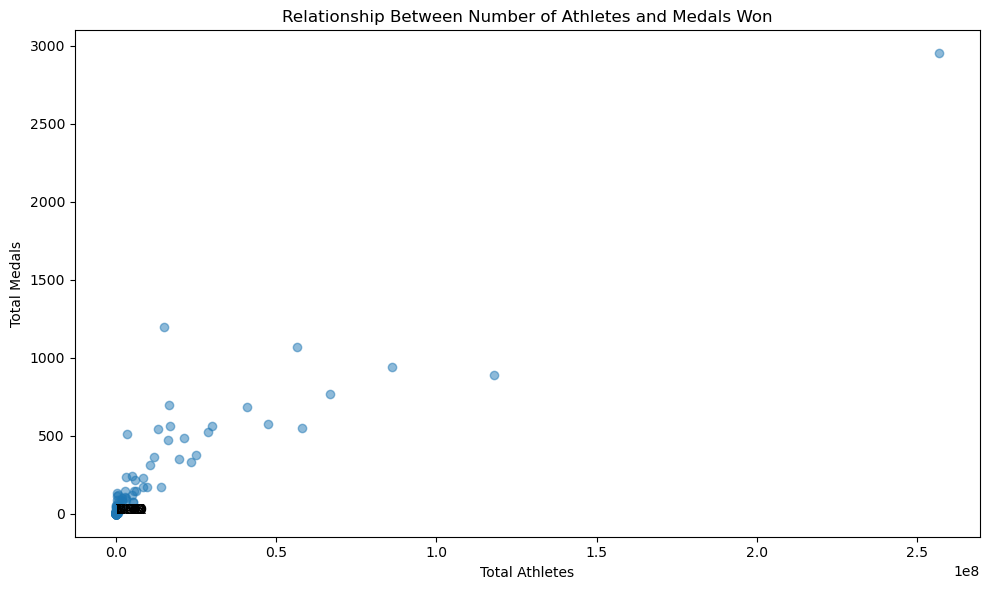

In [50]:
# Create scatter plot of total athletes vs medals
plt.figure(figsize=(10, 6))
plt.scatter(country_performance['Total_Athletes'], country_performance['total_medals'], alpha=0.5)
plt.xlabel('Total Athletes')
plt.ylabel('Total Medals')
plt.title('Relationship Between Number of Athletes and Medals Won')

# Add country labels for top 10 countries
for i in range(10):
    country = country_performance.iloc[i]
    plt.annotate(country['country_noc'], 
                (country['Total_Athletes'], country['total_medals']))

plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

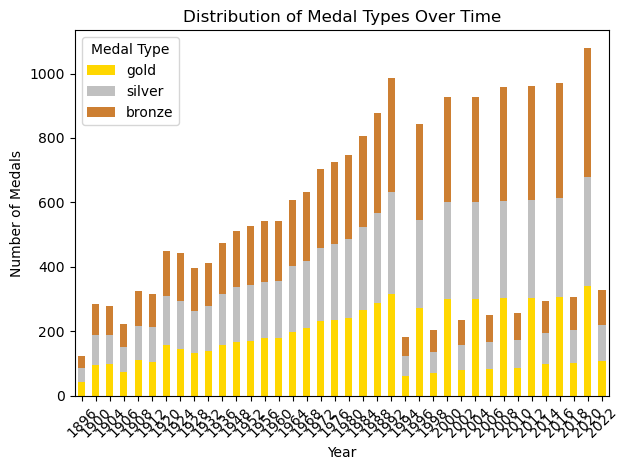

In [55]:
# Create stacked bar chart of medal types by year
custom_colors = ['gold', 'silver', '#cd7f32']  # Hex code for bronze

plt.figure(figsize=(15, 6))
medal_types.plot(kind='bar', stacked=True, color=custom_colors)
plt.title('Distribution of Medal Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

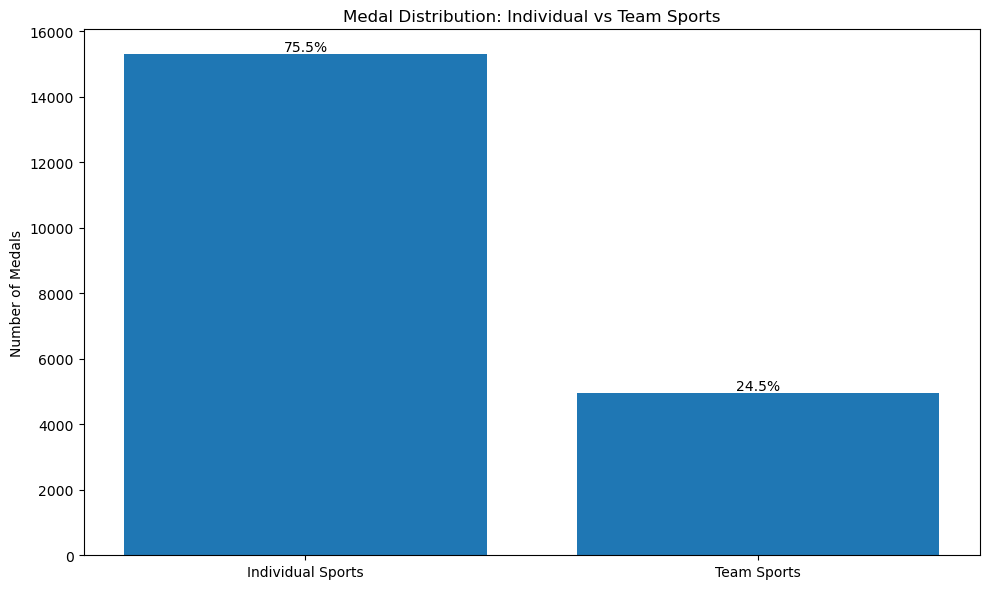

In [52]:
# Calculate success rate in team vs individual sports
team_vs_individual = athlete_results_clean[athlete_results_clean['medal'].notna()].groupby('isTeamSport')['medal'].count()

plt.figure(figsize=(10, 6))
bars = plt.bar(['Individual Sports', 'Team Sports'], team_vs_individual.values)
plt.title('Medal Distribution: Individual vs Team Sports')
plt.ylabel('Number of Medals')

# Add percentage labels on bars
total = team_vs_individual.sum()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{(height/total)*100:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

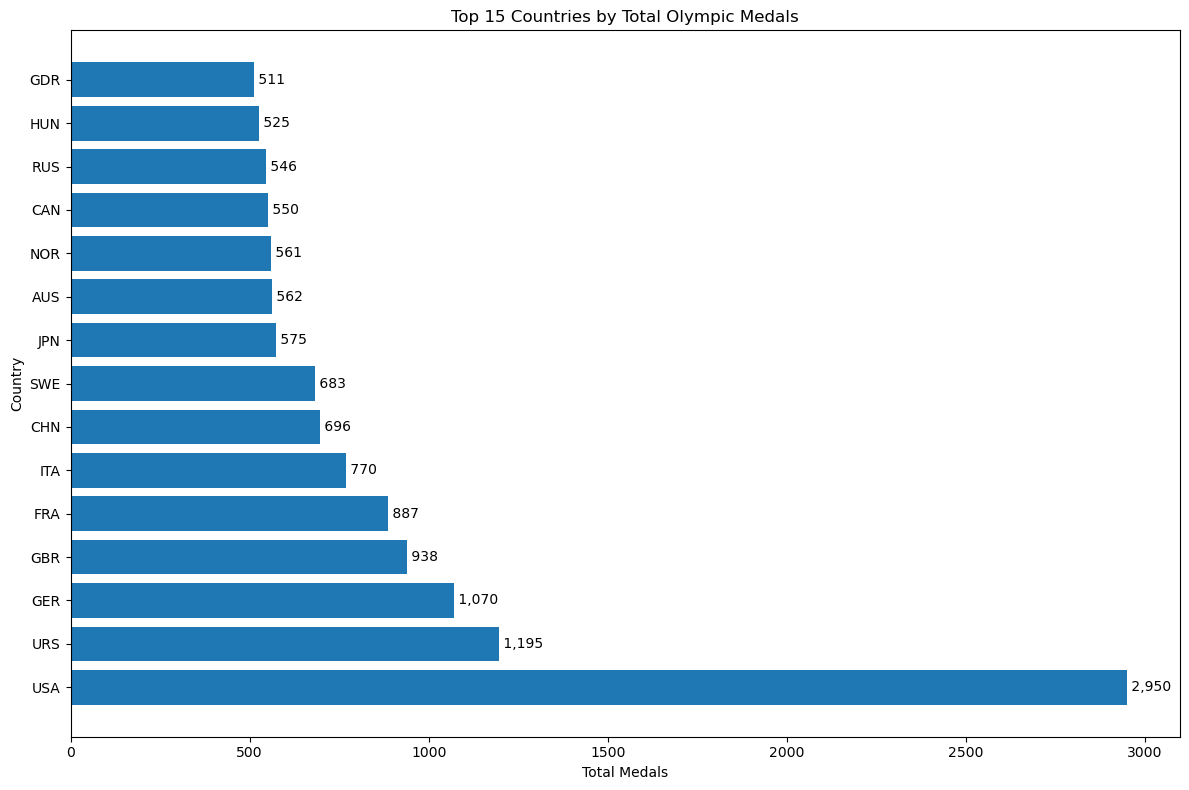

In [53]:
# Create horizontal bar chart of top 15 countries by total medals
top_15_countries = country_performance.nlargest(15, 'total_medals')

plt.figure(figsize=(12, 8))
plt.barh(top_15_countries['country_noc'], top_15_countries['total_medals'])
plt.title('Top 15 Countries by Total Olympic Medals')
plt.xlabel('Total Medals')
plt.ylabel('Country')

# Add value labels
for i, v in enumerate(top_15_countries['total_medals']):
    plt.text(v, i, f' {int(v):,}', va='center')

plt.tight_layout()
plt.show()